# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results,mouse_metadata, on="Mouse ID")
# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
num_of_mice = len(merge_df["Mouse ID"].unique())
num_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse 

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = merge_df.loc[merge_df['Mouse ID'] == 'g989',:]
dup_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df_cleaned = merge_df.loc[merge_df['Mouse ID'] != 'g989',:]
merge_df_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
num_of_mice_cleaned = len(merge_df_cleaned["Mouse ID"].unique())
num_of_mice_cleaned

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_volume = merge_df_cleaned.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_volume = merge_df_cleaned.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
volume_variance = merge_df_cleaned.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
volume_std = merge_df_cleaned.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
volume_sem = merge_df_cleaned.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame ({"Mean Tumor Volume":mean_volume,
                              "Median Tumor Volume":median_volume,
                              "Tumor Volume Variance":volume_variance,
                              "Tumor Volume Std. Dev":volume_std,
                              "Tumor Volume Std. Err.":volume_sem})
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_aggregate = merge_df_cleaned.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
# Using the aggregation method, produce the same summary statistics in a single line.
summary_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
#generate requested data set. Number of timepoints grouped by Drug Regimen
mice_count_by_drug = merge_df_cleaned.groupby(["Drug Regimen"]).count()["Timepoint"]
mice_count_by_drug = mice_count_by_drug.sort_values(ascending=False)
drug_regimen = merge_df_cleaned["Drug Regimen"].unique()
x_axis = np.arange(len(drug_regimen))

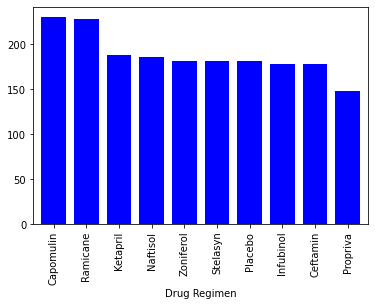

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pd_mouse_plot = mice_count_by_drug.plot(kind="bar",color="blue", width = .75)

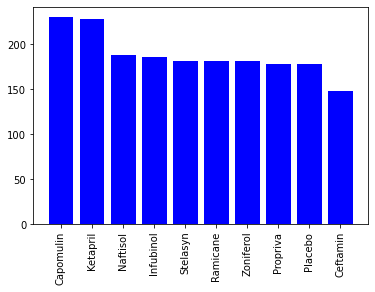

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(x_axis, mice_count_by_drug, color="blue", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen,rotation=90)
plt.show()

In [12]:
#Dataset up for pie charts
#pair down master data to unique mice
unique_mice_df = merge_df_cleaned.drop_duplicates(['Mouse ID'], keep='first')
unique_mice_df 
#count unique mice by Sex, convert to dataframe
sex_distribution = unique_mice_df.groupby(["Sex"]).count()["Mouse ID"]
#sex_distribution.to_frame()

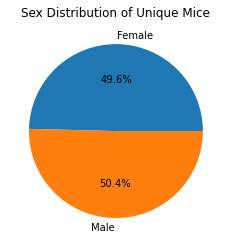

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pd_sex_distribution = sex_distribution.plot(kind="pie",autopct='%.1f%%', title ="Sex Distribution of Unique Mice")
plt.ylabel(None)
plt.show()

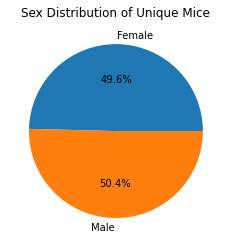

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distribution, labels = sex_distribution.index.values, autopct="%.1f%%")
plt.title("Sex Distribution of Unique Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# narrow down data set to specific 4 treatments
tumor_analysis_df = merge_df_cleaned.loc[merge_df_cleaned["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
#put greatest (most recent) timepoint at top of list
tumor_analysis_df = tumor_analysis_df.sort_values("Timepoint", ascending=False)
#dropped rows for all prior timepoints, leaving only the final measurement for each mouse
latest_tumor_measurement_df = tumor_analysis_df.drop_duplicates(['Mouse ID'], keep='first')
#narrowed down columns to data relevant to Boxplot
latest_tumor_measurement_df = latest_tumor_measurement_df[["Mouse ID","Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
latest_tumor_measurement_df.set_index("Mouse ID")

,Timepoint,Tumor Volume (mm3),Drug Regimen
Mouse ID,,,
m601,45,28.430964,Capomulin
s185,45,23.343598,Capomulin
y865,45,64.729837,Ceftamin
x581,45,64.634949,Ceftamin
l897,45,38.846876,Capomulin
...,...,...,...
m756,5,47.010364,Infubinol
b447,0,45.000000,Ceftamin
t573,0,45.000000,Ceftamin


In [17]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

#merge_tumor_df = pd.merge(latest_tumor_measurement_df,merge_df_cleaned, on=("Mouse ID", "Timepoint"), how="left")
#clean_merge_tumor_df =merge_tumor_df[["Mouse ID","Timepoint", "Tumor Volume (mm3)_x", "Drug Regimen_x"]]
#clean_merge_tumor_df = clean_merge_tumor_df.rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume (mm3)","Drug Regimen_x":"Drug Regimen"})
#clean_merge_tumor_df

In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
def get_treatment_data(treatment):
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = latest_tumor_measurement_df.loc[tumor_analysis_df["Drug Regimen"] == treatment,"Tumor Volume (mm3)"]
    
    if len(treatment_data)>0:
    
        # add subset 
        tumor_vol_data.append(treatment_data)
    
        # Determine outliers using upper and lower bounds
        q1 = treatment_data.quantile(.25)
        q2 = treatment_data.quantile(.50)
        q3 = treatment_data.quantile(.75)
        iqr = q3-q1
        lower_bound = q1-(1.5*iqr)
        upper_bound = q3+(1.5*iqr)

    
        print(f"{treatment}")
        print(f"Q1 = {q1}")
        print(f"Q3 = {q3}")
        print(f"The Interquartile Range = {iqr}")
        print(f"The Lower Bound = {lower_bound}")
        print(f"The Upper Bound = {upper_bound}")
        outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
   
        if len(outliers) == 0 :
            print("No potential Outliers detected in this data set")
        elif len(outliers) > 0 and outliers.values < lower_bound:
            print(f"The following data point is a potential outlier : {outliers.values} is less than the Lower Bound of {lower_bound}")
        elif len(outliers) > 0 and outliers.values > upper_bound:
            print(f"The following data point is a potential outlier : {outliers.values} is greater the Lower Bound of {upper_bound}")
    
    else:
        print(f"We do not have dataset available for Treatment: {treatment}")
    
for treatment in treatments:
    get_treatment_data(treatment)


We do not have dataset available for Treatment: Capomulim


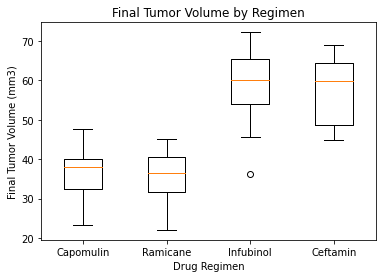

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(tumor_vol_data, labels=treatments)
plt.show()

## Line and Scatter Plots

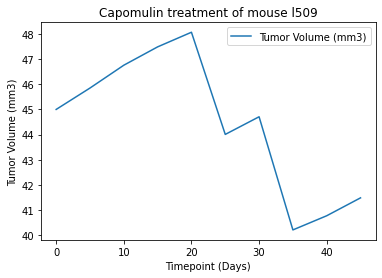

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


def get_treatment_lineplot(treatment, mouseID):
    #pull data set for treatment drug based on function input
    treatment_data = merge_df_cleaned.loc[merge_df_cleaned["Drug Regimen"] == treatment]
    #pull data for specific specifimen within treatment data
    mouse_data =  treatment_data.loc[treatment_data["Mouse ID"] == mouseID]
    
    #if mouse ID provided is within the data set for that treatment drug
    if len(mouse_data)>0:
        mouse_plot_data = mouse_data[["Timepoint","Tumor Volume (mm3)"]]
        mouse_plot_data.set_index('Timepoint')
        
        mouse_plot = mouse_plot_data.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)")
        mouse_plot.set_xlabel("Timepoint (Days)")
        mouse_plot.set_ylabel("Tumor Volume (mm3)")
        mouse_plot.set_title(f"{treatment} treatment of mouse {mouseID}")
        plt.show()
        
    #mouse ID and Treatment drug combination not valid/not found in dataset
    else:
        print("Invalid combination of Treatment Drug and Mouse ID")
        
get_treatment_lineplot("Capomulin", "l509")

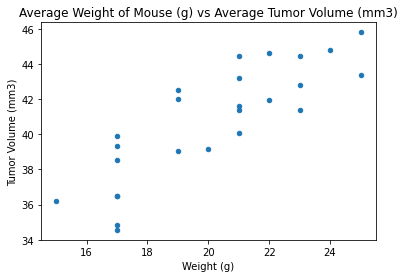

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
def get_treatment_scatter(treatment):
    treatment_data = merge_df_cleaned.loc[merge_df_cleaned["Drug Regimen"] == treatment]
    if len(treatment_data)>0:
        averages =treatment_data.groupby(["Mouse ID"]).mean()
    
    #mean_tumor_vol = treatment_data.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
    #mean_mouse_weight = treatment_data.groupby(["Mouse ID"]).mean()["Weight (g)"]
        scatter_plot = averages.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")
        scatter_plot.set_title("Average Weight of Mouse (g) vs Average Tumor Volume (mm3)")
        plt.show()
    else:
        print(f"We do not have dataset available for Treatment: {treatment}")
    
get_treatment_scatter("Capomulin")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

